In [48]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('C:\\Users\\joaco\\Python\\combinado_csv.csv', low_memory=False)

# This is a very little analysis of this Dataset in Jupyter

The dataset basically have information about stolen cars in Argentina, all the robberies was in 2022 in all the country

### The questions will be:
<ol>
    <li>Origin of the stolen cars</li>
    <li>Gender of the owners of the stolen cars</li>
    <li>Number of robberies for each province</li>
    <li>Top 10 provinces with most Robberies</li>
</ol>




Enjoy it!

---------------------------------------------------------
First I want to see what we have in the dataset

In [9]:
df

,tramite_tipo,tramite_fecha,fecha_inscripcion_inicial,registro_seccional_codigo,registro_seccional_descripcion,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_codigo,automotor_tipo_descripcion,...,automotor_uso_descripcion,titular_tipo_persona,titular_domicilio_localidad,titular_domicilio_provincia,titular_genero,titular_anio_nacimiento,titular_pais_nacimiento,titular_porcentaje_titularidad,titular_domicilio_provincia_id,titular_pais_nacimiento_id
0,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2022-01-18,1994-06-03,1173,BERAZATEGUI Nº 2,Buenos Aires,Nacional,1994.0,NaN,FURGON VIDRID.C/ASIE,...,Privado,Física,BERAZATEGUI,BUENOS AIRES,Masculino,1972.0,ARGENTINA,100,6,ARG
1,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2022-01-31,2000-10-27,1120,LA MATANZA Nº 03,Buenos Aires,Nacional,2000.0,NaN,SEDAN,...,Privado,Física,LOMAS DEL MIRADOR,BUENOS AIRES,Femenino,1991.0,ARGENTINA,100,6,ARG
2,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2022-01-11,1994-04-28,2086,CAPITAL FEDERAL Nº 086,Ciudad Autónoma de Bs.As.,Nacional,1994.0,NaN,FUR.VIDRIADO C/ASIEN,...,Privado,Física,C.AUTONOMA DE BS.AS,C.AUTONOMA DE BS.AS,Masculino,1971.0,PERU,100,2,NaN
3,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2022-01-10,1992-03-27,1119,MORON Nº 03,Buenos Aires,Importado,1991.0,NaN,RURAL 4 PTAS.,...,Privado,Física,HAEDO,BUENOS AIRES,No identificado,1982.0,ARGENTINA,50,6,ARG
4,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2022-01-24,2000-11-01,1118,QUILMES Nº 2,Buenos Aires,Nacional,2000.0,NaN,SEDAN 4 PUERTAS,...,Privado,Física,QUILMES OESTE,BUENOS AIRES,Masculino,1947.0,ARGENTINA,100,6,ARG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946845,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2022-12-14,1992-05-06,2035,CAPITAL FEDERAL Nº 035,Ciudad Autónoma de Bs.As.,Protocolo 21,1992.0,NaN,SEDAN 3 PUERTAS,...,Privado,Física,C.AUTONOMA DE BS.AS,C.AUTONOMA DE BS.AS,Femenino,1959.0,ARGENTINA,100,2,ARG
946846,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2022-12-14,1996-10-21,13018,MENDOZA Nº 11,Mendoza,Importado,1996.0,NaN,SEDAN 5 PTAS,...,Privado,Física,PRESIDENTE SARMIENTO,MENDOZA,Femenino,1985.0,ARGENTINA,50,50,ARG
946847,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2022-12-29,2008-05-30,13031,MAIPU Nº 1- MENDOZA,Mendoza,Nacional,2008.0,22.0,FURGON,...,Privado,Física,CIUDAD,MENDOZA,No identificado,1975.0,ARGENTINA,100,50,ARG
946848,COMUNICACIÓN DE RECUPERO,2022-12-29,2008-05-09,21054,ARROYO SECO Nº 2,Santa Fe,Protocolo 21,2008.0,22.0,SEDAN 3 PTAS,...,Privado,Física,ARROYO SECO,SANTA FE,Masculino,1983.0,ARGENTINA,100,82,ARG


In [10]:
df.columns

Index(['tramite_tipo', 'tramite_fecha', 'fecha_inscripcion_inicial',
       'registro_seccional_codigo', 'registro_seccional_descripcion',
       'registro_seccional_provincia', 'automotor_origen',
       'automotor_anio_modelo', 'automotor_tipo_codigo',
       'automotor_tipo_descripcion', 'automotor_marca_codigo',
       'automotor_marca_descripcion', 'automotor_modelo_codigo',
       'automotor_modelo_descripcion', 'automotor_uso_codigo',
       'automotor_uso_descripcion', 'titular_tipo_persona',
       'titular_domicilio_localidad', 'titular_domicilio_provincia',
       'titular_genero', 'titular_anio_nacimiento', 'titular_pais_nacimiento',
       'titular_porcentaje_titularidad', 'titular_domicilio_provincia_id',
       'titular_pais_nacimiento_id'],
      dtype='object')

In [13]:
df.dtypes

tramite_tipo                       object
tramite_fecha                      object
fecha_inscripcion_inicial          object
registro_seccional_codigo           int64
registro_seccional_descripcion     object
registro_seccional_provincia       object
automotor_origen                   object
automotor_anio_modelo             float64
automotor_tipo_codigo              object
automotor_tipo_descripcion         object
automotor_marca_codigo             object
automotor_marca_descripcion        object
automotor_modelo_codigo            object
automotor_modelo_descripcion       object
automotor_uso_codigo                int64
automotor_uso_descripcion          object
titular_tipo_persona               object
titular_domicilio_localidad        object
titular_domicilio_provincia        object
titular_genero                     object
titular_anio_nacimiento           float64
titular_pais_nacimiento            object
titular_porcentaje_titularidad      int64
titular_domicilio_provincia_id    

### Alright, so we have 25 columns and close to 1 million rows in the data set, there is information about dates, description of the vehicle, who owned it, where it was stolen, etc.

Now I want to know the origin of the stolen cars

In [20]:
df['automotor_origen'].value_counts()

Nacional        451875
Protocolo 21    365075
Importado       129900
Name: automotor_origen, dtype: int64

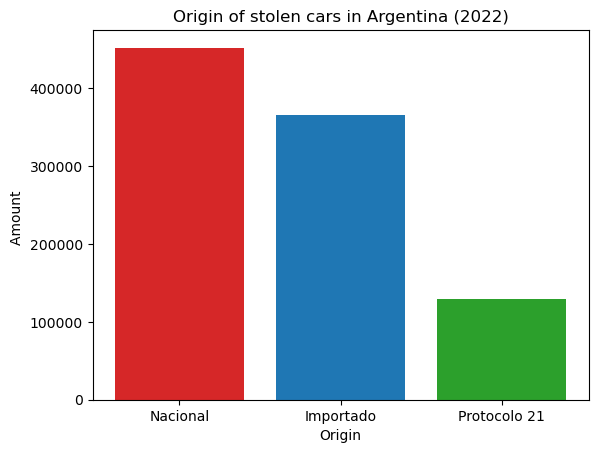

In [25]:
x = df['automotor_origen'].unique()
y = df['automotor_origen'].value_counts()
colors = ['tab:red','tab:blue','tab:green']

plt.bar(x, y, color=colors)
plt.title("Origin of stolen cars in Argentina (2022)")
plt.xlabel("Origin")
plt.ylabel("Amount ")
plt.show()

Most stolen cars are made in Argentina

-----------------------------------------------------------------------------------------
### Next, let's see the gender of the owners of the stolen cars

([<matplotlib.patches.Wedge at 0x21e863a6100>,
 [Text(-0.02919448765494532, 1.099612514429772, 'Masculino'),
  Text(-0.7254546531265961, -0.8268709368800976, 'Femenino'),
  Text(0.6923920122220749, -0.8547475074026635, 'No identificado'),
  Text(1.08873267193814, -0.15703875016835425, 'No aplica')],
 [Text(-0.015924265993606534, 0.599788644234421, '50.8%'),
  Text(-0.39570253806905237, -0.4510205110255077, '25.4%'),
  Text(0.3776683703029499, -0.46622591312872547, '19.2%'),
  Text(0.5938541846935308, -0.08565750009182958, '4.6%')])

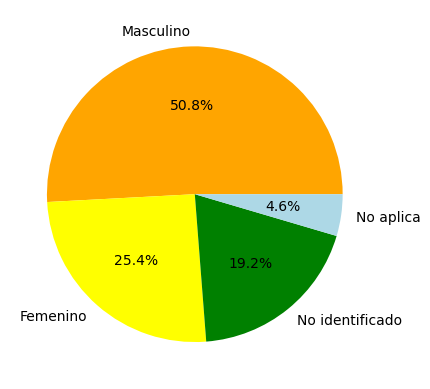

In [37]:
labels = df['titular_genero'].unique()
values = df['titular_genero'].value_counts()

plt.pie(values, labels=labels, colors=['orange', 'yellow','green','lightblue'], autopct='%1.1f%%')

Masculino = Male <br>
Femenino = Female <br>
No identificado = No identified <br>
No aplica = Doesn't apply (This mean that the owner of the stolen car is the government or a private company)

----------------------------------------
### What is the number of robberies for each province?

In [29]:
df['registro_seccional_provincia'].value_counts()

Buenos Aires                 626550
Ciudad Autónoma de Bs.As.    121075
Córdoba                       80450
Mendoza                       46425
Santa Fe                      43250
Neuquén                        5825
Río Negro                      3600
Entre Ríos                     3275
Corrientes                     2375
Chubut                         2050
Tucumán                        1650
Chaco                          1425
Misiones                       1275
San Luis                       1100
Jujuy                          1025
Salta                          1025
Tierra del Fuego                800
Santa Cruz                      700
San Juan                        675
Santiago del Estero             625
La Pampa                        625
Formosa                         550
La Rioja                        325
Catamarca                       175
Name: registro_seccional_provincia, dtype: int64

### Top 10 provinces with most robberies

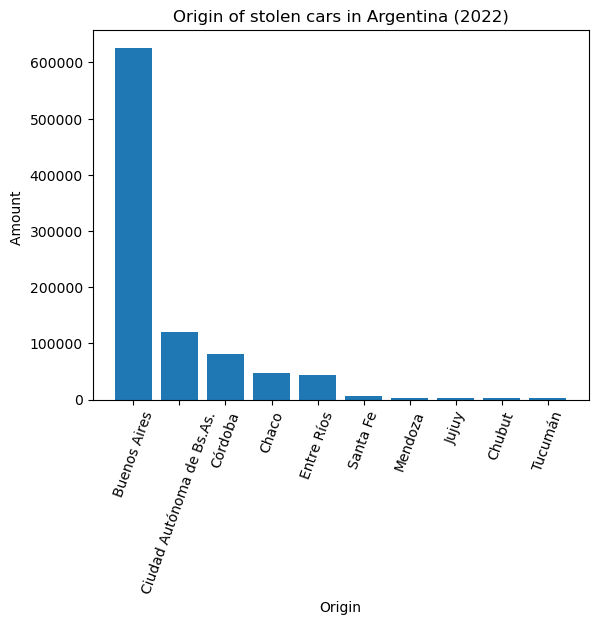

In [35]:
x = df['registro_seccional_provincia'].unique()[:10]
y = df['registro_seccional_provincia'].value_counts()[:10]



plt.bar(x, y)
plt.title("Origin of stolen cars in Argentina (2022)")
plt.xlabel("Origin")
plt.ylabel("Amount ")
plt.xticks(rotation=70)
plt.show()

As we can imagine, Buenos Aires and CABA (Buenos Aires City) are the most populated provinces in Argentina, thus are the provinces with more stolen cars in Argentina (With difference).

-----------------------------------
Well, this is the end, maybe in the future I would expand this analysis because the dataset is giant, or maybe I could combine this dataset with another one.
But for the moment this is all, see you.